# PDF text extraction

This notebook covers the experiments done for PDF text extraction

In [1]:
pdf_path = "../../data/cao-pdfs/Cao Bouw en Infra 2025 - 2027.pdf"

## MarkItDown

Link: https://github.com/microsoft/markitdown

In [23]:
from markitdown import MarkItDown

md = MarkItDown(enable_plugins=True) # Set to True to enable plugins
# Load the PDF file
result = md.convert(pdf_path)

print(result)

cao Bouw & Infra 2025 – 2027

cao Bouw & Infra 2025 - 2027, 19 juni 2025

1

Inhoudsopgave

1.   In dienst – uit dienst ............................................................................................................ 5
1.1  Intredekeuring ................................................................................................................. 5
1.2  Functie-indeling .............................................................................................................. 6
1.3  Arbeidsovereenkomst ...................................................................................................... 7
1.4  Tijdens de arbeidsovereenkomst: bouwplaatswerknemer ............................................... 9
1.5  Tijdens de arbeidsovereenkomst: uta-werknemer ......................................................... 10
1.6  Beëindiging arbeidsovereenkomst ................................................................................ 11
1.7  Afrekenen bij beëindig

In [24]:
print(result.markdown)

cao Bouw & Infra 2025 – 2027

cao Bouw & Infra 2025 - 2027, 19 juni 2025

1

Inhoudsopgave

1.   In dienst – uit dienst ............................................................................................................ 5
1.1  Intredekeuring ................................................................................................................. 5
1.2  Functie-indeling .............................................................................................................. 6
1.3  Arbeidsovereenkomst ...................................................................................................... 7
1.4  Tijdens de arbeidsovereenkomst: bouwplaatswerknemer ............................................... 9
1.5  Tijdens de arbeidsovereenkomst: uta-werknemer ......................................................... 10
1.6  Beëindiging arbeidsovereenkomst ................................................................................ 11
1.7  Afrekenen bij beëindig

## Docling

Link: https://github.com/docling-project/docling

In [7]:
from pathlib import Path

import pandas as pd

from docling.document_converter import DocumentConverter

converter = DocumentConverter()

In [8]:
from docling.datamodel.accelerator_options import AcceleratorDevice, AcceleratorOptions
from docling.datamodel.base_models import InputFormat
from docling.datamodel.pipeline_options import (
    PdfPipelineOptions,
)
from docling.datamodel.settings import settings
from docling.document_converter import DocumentConverter, PdfFormatOption

# Explicitly set the accelerator
# accelerator_options = AcceleratorOptions(
#     num_threads=8, device=AcceleratorDevice.AUTO
# )
# accelerator_options = AcceleratorOptions(
#     num_threads=8, device=AcceleratorDevice.CPU
# )
# accelerator_options = AcceleratorOptions(
#     num_threads=8, device=AcceleratorDevice.MPS
# )
accelerator_options = AcceleratorOptions(
    num_threads=8, device=AcceleratorDevice.CUDA
)

pipeline_options = PdfPipelineOptions()
pipeline_options.accelerator_options = accelerator_options
pipeline_options.do_ocr = False
pipeline_options.do_table_structure = True
pipeline_options.table_structure_options.do_cell_matching = True

converter = DocumentConverter(
    format_options={
        InputFormat.PDF: PdfFormatOption(
            pipeline_options=pipeline_options,
        )
    }
)

In [9]:
# Convert the document
conversion_result = converter.convert(pdf_path)

2025-09-20 01:01:11,466 - INFO - detected formats: [<InputFormat.PDF: 'pdf'>]
2025-09-20 01:01:11,502 - INFO - Going to convert document batch...
2025-09-20 01:01:11,503 - INFO - Initializing pipeline for StandardPdfPipeline with options hash 12a1aaae4d2de3c2950eea38387e79f2
2025-09-20 01:01:11,504 - WARNING - CUDA is not available in the system. Fall back to 'CPU'
2025-09-20 01:01:11,505 - INFO - Accelerator device: 'cpu'
2025-09-20 01:01:15,660 - WARNING - CUDA is not available in the system. Fall back to 'CPU'
2025-09-20 01:01:15,661 - INFO - Accelerator device: 'cpu'
2025-09-20 01:01:16,018 - INFO - Processing document Cao Bouw en Infra 2025 - 2027.pdf
2025-09-20 01:04:51,763 - INFO - Finished converting document Cao Bouw en Infra 2025 - 2027.pdf in 220.30 sec.


In [ ]:
output_dir = Path("scratch")
output_dir.mkdir(parents=True, exist_ok=True)

doc_filename = conversion_result.input.file.stem

In [10]:
print(f"Document has {len(conversion_result.document.pages)} pages and {len(conversion_result.document.tables)} tables.")
print(f"Document text content:\n{conversion_result.document.export_to_markdown()}...")

Document has 178 pages and 68 tables.
Document text content:
## cao Bouw &amp; Infra 2025 -2027

## Inhoudsopgave

| 1. In                                                                                                                                   | dienst - uit dienst............................................................................................................ 5                                                                                            |
|-----------------------------------------------------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| 1.1 Intredekeuring                                                                                                                      | ...................

In [ ]:
# Export tables
for table_ix, table in enumerate(conversion_result.document.tables):
    table_df: pd.DataFrame = table.export_to_dataframe(doc=conversion_result.document)
    print(f"## Table {table_ix}")
    print(table_df.to_markdown())

    # Save the table as CSV
    element_csv_filename = output_dir / f"{doc_filename}-table-{table_ix + 1}.csv"
    table_df.to_csv(element_csv_filename)

## PDFPlumber

Link: https://github.com/jsvine/pdfplumber

In [14]:
import pdfplumber
print(pdfplumber.__version__)

pdf = pdfplumber.open(pdf_path)

0.11.7


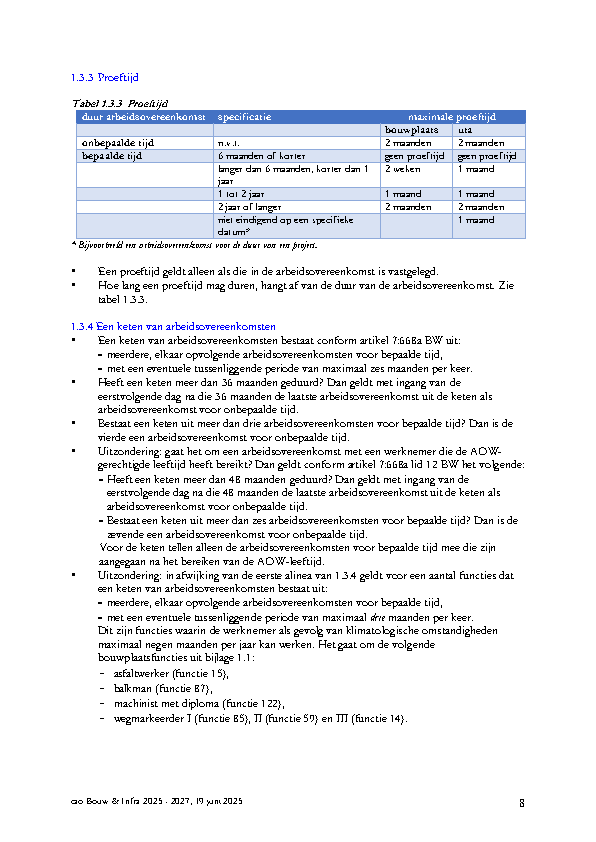

In [15]:
page = pdf.pages[7]
im = page.to_image()
im

In [16]:
text = page.extract_text()
print(text)

1.3.3 Proeftijd
Tabel 1.3.3 Proeftijd
duur arbeidsovereenkomst specificatie maximale proeftijd
bouwplaats uta
onbepaalde tijd n.v.t. 2 maanden 2 maanden
bepaalde tijd 6 maanden of korter geen proeftijd geen proeftijd
langer dan 6 maanden, korter dan 1 2 weken 1 maand
jaar
1 tot 2 jaar 1 maand 1 maand
2 jaar of langer 2 maanden 2 maanden
niet eindigend op een specifieke 1 maand
datum*
* Bijvoorbeeld een arbeidsovereenkomst voor de duur van een project.
▪ Een proeftijd geldt alleen als die in de arbeidsovereenkomst is vastgelegd.
▪ Hoe lang een proeftijd mag duren, hangt af van de duur van de arbeidsovereenkomst. Zie
tabel 1.3.3.
1.3.4 Een keten van arbeidsovereenkomsten
▪ Een keten van arbeidsovereenkomsten bestaat conform artikel 7:668a BW uit:
- meerdere, elkaar opvolgende arbeidsovereenkomsten voor bepaalde tijd,
- met een eventuele tussenliggende periode van maximaal zes maanden per keer.
▪ Heeft een keten meer dan 36 maanden geduurd? Dan geldt met ingang van de
eerstvolgende dag na

In [17]:
table = page.extract_tables()
print(table)

[[['', 'duur arbeidsovereenkomst', '', '', 'specificatie', '', '', 'maximale proeftijd', None, None, None, ''], ['', '', '', '', '', '', '', 'bouwplaats', '', '', 'uta', ''], ['onbepaalde tijd', None, None, 'n.v.t.', None, None, '2 maanden', None, None, '2 maanden', None, None], ['', 'bepaalde tijd', '', '', '6 maanden of korter', '', '', 'geen proeftijd', '', '', 'geen proeftijd', ''], ['', None, None, 'langer dan 6 maanden, korter dan 1\njaar', None, None, '2 weken', None, None, '1 maand', None, None], ['', '', '', '', '1 tot 2 jaar', '', '', '1 maand', '', '', '1 maand', ''], ['', None, None, '2 jaar of langer', None, None, '2 maanden', None, None, '2 maanden', None, None], ['', None, None, '', 'niet eindigend op een specifieke', '', '', None, None, '1 maand', None, None], [None, None, None, None, 'datum*', None, None, None, None, None, None, None]]]


## PyMUPDF

Link: https://github.com/pymupdf/PyMuPDF

In [19]:
import pymupdf # imports the pymupdf library
doc = pymupdf.open(pdf_path) # open a document
#for page in doc: # iterate the document pages
page = doc[7] # get page 7 (0-based)

In [20]:
text = page.get_text() # get plain text encoded as UTF-8
print(text)

cao Bouw & Infra 2025 - 2027, 19 juni 2025    
8 
1.3.3 Proeftijd 
 
Tabel 1.3.3  Proeftijd 
duur arbeidsovereenkomst 
specificatie 
maximale proeftijd 
 
 
bouwplaats 
uta 
onbepaalde tijd 
n.v.t. 
2 maanden 
2 maanden 
bepaalde tijd 
6 maanden of korter 
geen proeftijd 
geen proeftijd 
 
langer dan 6 maanden, korter dan 1 
jaar 
2 weken 
1 maand 
 
1 tot 2 jaar 
1 maand 
1 maand 
 
2 jaar of langer 
2 maanden 
2 maanden 
 
niet eindigend op een specifieke 
datum* 
 
1 maand 
* Bijvoorbeeld een arbeidsovereenkomst voor de duur van een project. 
 
▪ 
Een proeftijd geldt alleen als die in de arbeidsovereenkomst is vastgelegd.  
▪ 
Hoe lang een proeftijd mag duren, hangt af van de duur van de arbeidsovereenkomst. Zie 
tabel 1.3.3.  
 
1.3.4 Een keten van arbeidsovereenkomsten 
▪ 
Een keten van arbeidsovereenkomsten bestaat conform artikel 7:668a BW uit:  
- meerdere, elkaar opvolgende arbeidsovereenkomsten voor bepaalde tijd,  
- met een eventuele tussenliggende periode van maximaal zes 

In [ ]:
tables = page.find_tables()
table = tables[0].to_pandas()
print(table.to_markdown())

|    | Col0            | duur arbeidsovereenkomst   | Col2   | Col3                               | specificatie                     | Col5   | Col6      | maximale proeftijd   | Col8   | Col9      | Col10          | Col11   |
|---:|:----------------|:---------------------------|:-------|:-----------------------------------|:---------------------------------|:-------|:----------|:---------------------|:-------|:----------|:---------------|:--------|
|  0 |                 |                            |        |                                    |                                  |        |           | bouwplaats           |        |           | uta            |         |
|  1 | onbepaalde tijd |                            |        | n.v.t.                             |                                  |        | 2 maanden |                      |        | 2 maanden |                |         |
|  2 |                 | bepaalde tijd              |        |                              

## Azure Document Intelligence

Link: https://github.com/Azure-Samples/document-intelligence-code-samples

In [51]:
import os
from azure.core.credentials import AzureKeyCredential
from azure.ai.documentintelligence import DocumentIntelligenceClient
from azure.ai.documentintelligence.models import AnalyzeDocumentRequest, DocumentContentFormat

In [71]:
def analyze_layout_from_url():
    # Set your endpoint and key from environment variables
    # For how to set them, see PREREQUISITES above.
    endpoint = os.environ["DOCUMENTINTELLIGENCE_ENDPOINT"]
    key = os.environ["DOCUMENTINTELLIGENCE_API_KEY"]

    document_intelligence_client = DocumentIntelligenceClient(
        endpoint=endpoint, credential=AzureKeyCredential(key)
    )

    file = open(pdf_path, "rb")

    # convert to bytes
    pdf_bytes = file.read()

    # Analyze a sample document layout    
    poller = document_intelligence_client.begin_analyze_document(
        "prebuilt-layout", 
        AnalyzeDocumentRequest(bytes_source=pdf_bytes),
    )
    result = poller.result()

    return result

In [72]:
def print_layout_analysis(result):
    # Analyze styles (e.g., whether the document contains handwritten content)
    # if result.styles:
    #     for idx, style in enumerate(result.styles):
    #         print(
    #             "Document contains {} content".format(
    #                 "handwritten" if style.is_handwritten else "no handwritten"
    #             )
    #         )

    # Analyze pages
    # for page in result.pages:
    #     print(f"----Analyzing layout from page #{page.page_number}----")

    #     # Analyze lines
    #     if page.lines:
    #         for line_idx, line in enumerate(page.lines):
    #             print(
    #                 f"...Line #{line_idx} has text content '{line.content}'"
    #             )

    # Analyze tables
    if result.tables:
        print(f"----Analyzing {len(result.tables)} tables found in the document----")
        for table_idx, table in enumerate(result.tables[4:]):
            print(
                f"Table #{table_idx} has {table.row_count} rows and {table.column_count} columns"
            )
            for cell in table.cells:
                print(
                    f"...Cell[{cell.row_index}][{cell.column_index}] has content '{cell.content}'"
                )

    print("----------------------------------------")

In [73]:
from azure.core.exceptions import HttpResponseError
from dotenv import find_dotenv, load_dotenv

try:
    load_dotenv(find_dotenv())
    result = analyze_layout_from_url()
except HttpResponseError as error:
    # Examples of how to check an HttpResponseError
    if error.error is not None:
        if error.error.code == "InvalidImage":
            print(f"Received an invalid image error: {error.error}")
        elif error.error.code == "InvalidRequest":
            print(f"Received an invalid request error: {error.error}")
        raise
    if "Invalid request".casefold() in error.message.casefold():
        print(f"Uh-oh! Seems there was an invalid request: {error}")
    raise

In [74]:
for table in result.tables[5:6]:
    print(f"----Analyzing table with {table.row_count} rows and {table.column_count} columns----")
    for cell in table.cells:
        # print the table like a markdown table
        print(f"| {cell.content} ", end="")
        if cell.column_index == table.column_count - 1:
            print("|")

----Analyzing table with 5 rows and 3 columns----
| duur arbeidsovereenkomst | opzegtermijn werkgever | opzegtermijn werknemer |
| korter dan 5 jaar | 1 maand | 1 maand |
| 5 tot 10 jaar | 2 maanden | 1 maand |
| 10 tot 15 jaar | 3 maanden | 1 maand |
| 15 jaar of langer | 4 maanden | 1 maand |


In [75]:
try:
    print_layout_analysis(result)
except HttpResponseError as error:
    # Examples of how to check an HttpResponseError
    if error.error is not None:
        if error.error.code == "InvalidImage":
            print(f"Received an invalid image error: {error.error}")
        elif error.error.code == "InvalidRequest":
            print(f"Received an invalid request error: {error.error}")
        raise
    if "Invalid request".casefold() in error.message.casefold():
        print(f"Uh-oh! Seems there was an invalid request: {error}")
    raise

----Analyzing 74 tables found in the document----
Table #0 has 8 rows and 4 columns
...Cell[0][0] has content 'duur arbeidsovereenkomst'
...Cell[0][1] has content 'specificatie'
...Cell[0][2] has content 'maximale proeftijd'
...Cell[1][0] has content ''
...Cell[1][1] has content ''
...Cell[1][2] has content 'bouwplaats'
...Cell[1][3] has content 'uta'
...Cell[2][0] has content 'onbepaalde tijd'
...Cell[2][1] has content 'n.v.t.'
...Cell[2][2] has content '2 maanden'
...Cell[2][3] has content '2 maanden'
...Cell[3][0] has content 'bepaalde tijd'
...Cell[3][1] has content '6 maanden of korter'
...Cell[3][2] has content 'geen proeftijd'
...Cell[3][3] has content 'geen proeftijd'
...Cell[4][0] has content ''
...Cell[4][1] has content 'langer dan 6 maanden, korter dan 1 jaar'
...Cell[4][2] has content '2 weken'
...Cell[4][3] has content '1 maand'
...Cell[5][0] has content ''
...Cell[5][1] has content '1 tot 2 jaar'
...Cell[5][2] has content '1 maand'
...Cell[5][3] has content '1 maand'
...C